In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [97]:
data=pd.read_csv('world_happiness_report.csv')
data

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
148,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,51.7,Africa
149,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,62.7,Asia-Pacific
150,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,57.8,Africa
151,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,54.3,Africa


In [98]:
data.shape

(153, 12)

In [99]:
data.set_index('Country',inplace=True)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, Norway to Central African Republic
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Happiness Rank    153 non-null    int64  
 1   Happiness Score   153 non-null    float64
 2   Economy           153 non-null    float64
 3   Family            153 non-null    float64
 4   Health            153 non-null    float64
 5   Freedom           153 non-null    float64
 6   Generosity        153 non-null    float64
 7   Corruption        153 non-null    float64
 8   Dystopia          153 non-null    float64
 9   Job Satisfaction  151 non-null    float64
 10  Region            153 non-null    object 
dtypes: float64(9), int64(1), object(1)
memory usage: 14.3+ KB


In [101]:
data.isnull().sum()

Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    2
Region              0
dtype: int64

In [102]:
nulls=data[data.isnull().any(axis=1)]

In [103]:
nulls.head()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
North Cyprus,61,5.810,1.346911,1.186303,0.834647,0.471204,0.266846,0.155353,1.549158,NaN,Eastern Europe
South Sudan,147,3.591,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567,NaN,Africa


In [104]:
data.dropna(inplace=True)

In [105]:
data.isnull().sum()

Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    0
Region              0
dtype: int64

In [106]:
data.duplicated().sum()

0

# Statistical Summary

In [107]:
data.describe()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,77.827815,5.357874,0.983895,1.190509,0.550794,0.409805,0.244914,0.123008,1.854910,75.209934
std,44.934732,1.132826,0.420955,0.286371,0.236116,0.150144,0.135236,0.102776,0.502189,12.962365
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
25%,39.500000,4.505500,0.663371,1.042635,0.369866,0.303677,0.152574,0.056919,1.605148,68.950000
50%,78.000000,5.279000,1.064578,1.253918,0.606042,0.437454,0.230947,0.089283,1.832910,78.100000
75%,116.500000,6.101500,1.314879,1.418162,0.715975,0.519467,0.323762,0.152207,2.161605,85.100000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


In [108]:
data.sort_values(by='Happiness Rank',ascending=True).head(10)

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,North America
New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,92.7,Western Europe


In [109]:
data.sort_values(by='Happiness Rank',ascending=False).head(10)

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
Central African Republic,155,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,70.4,Africa
Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,54.3,Africa
Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,57.8,Africa
Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,62.7,Asia-Pacific
Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,51.7,Africa
Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,44.8,Africa
Guinea,149,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,55.1,Africa
Liberia,148,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,56.6,Africa
Yemen,146,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601,58.9,Asia-Pacific


In [110]:
data_Region = data.groupby('Region')

In [111]:
data_Region['Happiness Score'].describe().sort_values(by='mean',ascending=True).head(10)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Europe,1.0,4.096000,NaN,4.096,4.09600,4.0960,4.09600,4.096
Africa,43.0,4.254581,0.682470,2.693,3.80150,4.1900,4.63450,5.872
Asia-Pacific,43.0,5.358326,0.955062,3.462,4.65000,5.2690,6.02750,7.314
Eastern Europe,21.0,5.498952,0.402033,4.644,5.23700,5.5690,5.83800,6.098
Latin America,22.0,5.957818,0.750925,3.603,5.54850,6.0395,6.45400,7.079
Western Europe,19.0,6.880474,0.611070,5.195,6.56800,6.9510,7.42300,7.537
North America,2.0,7.154500,0.228395,6.993,7.07375,7.1545,7.23525,7.316


In [112]:
data[data['Region']=='Europe'].head()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
Ukraine,132,4.096,0.894652,1.394538,0.575904,0.122975,0.270061,0.023029,0.814382,72.3,Europe


In [113]:
data_Region['Happiness Score'].describe().sort_values(by='mean',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,2.0,7.154500,0.228395,6.993,7.07375,7.1545,7.23525,7.316
Western Europe,19.0,6.880474,0.611070,5.195,6.56800,6.9510,7.42300,7.537
Latin America,22.0,5.957818,0.750925,3.603,5.54850,6.0395,6.45400,7.079
Eastern Europe,21.0,5.498952,0.402033,4.644,5.23700,5.5690,5.83800,6.098
Asia-Pacific,43.0,5.358326,0.955062,3.462,4.65000,5.2690,6.02750,7.314
Africa,43.0,4.254581,0.682470,2.693,3.80150,4.1900,4.63450,5.872
Europe,1.0,4.096000,NaN,4.096,4.09600,4.0960,4.09600,4.096


In [114]:
data_A = data[data['Region']== 'Africa']
data_WE = data[data['Region']=='Western Europe']
data_EE = data[data['Region']=='Eastern Europe']
data_LA = data[data['Region']=='Latin America']
data_AP = data[data['Region']=='Asia-Pacific']
data_NA = data[data['Region']=='North America']
data_E = data[data['Region']=='Europe']


In [115]:
len(data_A[data_A['Happiness Score']>6])

0

In [116]:
print("There are {} countries in Africa that have a Happiness score above 6.0 ".format(len(data_A[data_A['Happiness Score'] > 6])))

There are 0 countries in Africa that have a Happiness score above 6.0 


In [117]:
len(data_WE[data_WE['Happiness Score'] > 6])

17

In [118]:
print("There are {} countries in Western Europe that have a happiness score above 6.0 ".format(len(data_WE[data_WE['Happiness Score'] > 6])))

There are 17 countries in Western Europe that have a happiness score above 6.0 


In [119]:
len(data_EE[data_EE['Happiness Score'] > 6])

1

In [120]:
print("There is {} country in Eastern Europe that has a happiness score above 6.0 ".format(len(data_EE[data_EE['Happiness Score'] > 6])))

There is 1 country in Eastern Europe that has a happiness score above 6.0 


In [121]:
len(data_AP[data_AP['Happiness Score'] > 6])

11

In [122]:
print("There are {} countries in the Asia Pacific that have a happiness score above 6.0 ".format(len(data_AP[data_AP['Happiness Score'] > 6])))

There are 11 countries in the Asia Pacific that have a happiness score above 6.0 


In [123]:
len(data_LA[data_LA['Happiness Score'] > 6])

13

In [124]:
print("There are {} countries in the Latin America that have a happiness score above 6.0 ".format(len(data_LA[data_LA['Happiness Score'] > 6])))

There are 13 countries in the Latin America that have a happiness score above 6.0 


In [125]:
len(data_NA[data_NA['Happiness Score'] > 6])

2

In [126]:
print("There are {} countries in the North America that have a happiness score above 6.0 ".format(len(data_NA[data_NA['Happiness Score'] > 6])))

There are 2 countries in the North America that have a happiness score above 6.0 


In [127]:
Delta_NA = data_NA.max(axis=0)['Happiness Score'] - data_NA.min(axis=0)['Happiness Score']
print(Delta_NA)

0.32299995400000014


In [128]:
Delta_EE = data_EE.max(axis=0)['Happiness Score'] - data_EE.min(axis=0)['Happiness Score']
print(Delta_EE)

1.4539999969999995


In [129]:
Delta_WE = data_WE.max(axis=0)['Happiness Score'] - data_WE.min(axis=0)['Happiness Score']
print(Delta_WE)

2.3420000069999993


In [130]:
Delta_A = data_A.max(axis=0)['Happiness Score'] - data_A.min(axis=0)['Happiness Score']
print(Delta_A)

3.179000139


In [131]:
Delta_LA = data_LA.max(axis=0)['Happiness Score'] - data_LA.min(axis=0)['Happiness Score']
print(Delta_LA)

3.47600007


In [132]:
Delta_AP = data_AP.max(axis=0)['Happiness Score'] - data_AP.min(axis=0)['Happiness Score']
print(Delta_AP)

3.852000237


In [133]:
Delta_E = data_E.max(axis=0)['Happiness Score'] - data_E.min(axis=0)['Happiness Score']
print(Delta_E)

0.0


In [134]:
Deltas = {}

In [135]:
Deltas["North America"] = Delta_NA
Deltas["Eastern Europe"] = Delta_EE
Deltas["Western Europe"] = Delta_WE
Deltas["Africa"] = Delta_A
Deltas["Latin America"] = Delta_LA
Deltas["Asia Pacific"] = Delta_AP
Deltas["Europe"]= Delta_E

In [136]:
print("The {} region seems to have the largest range of happiness scores".format(max(Deltas, key=Deltas.get)))

The Asia Pacific region seems to have the largest range of happiness scores


# Bar Plot Happiness Score

<AxesSubplot:ylabel='Frequency'>

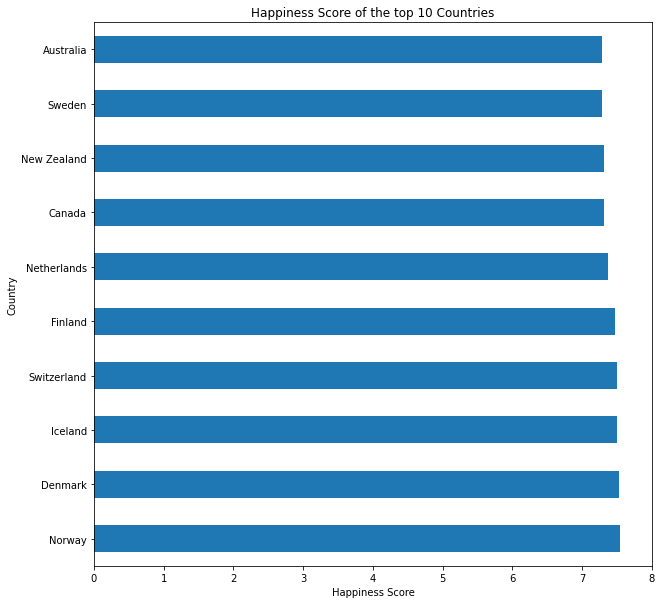

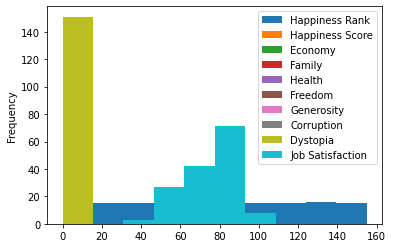

In [137]:
data['Happiness Score'].head(10).plot(xticks=np.arange(9), kind='barh', figsize= (10, 10))
plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')
data.plot.hist()

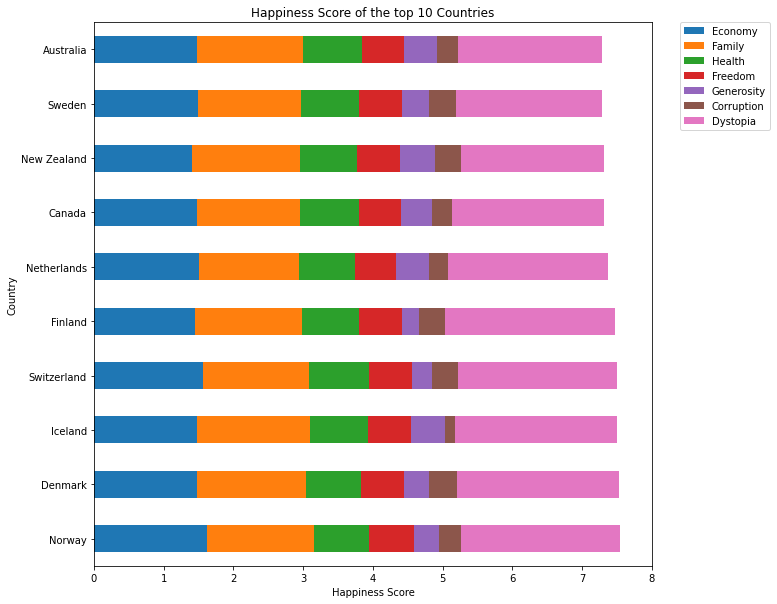

In [138]:
data[['Economy', 'Family','Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia']].head(10).plot(kind='barh',
                                                                xticks=np.arange(9), stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

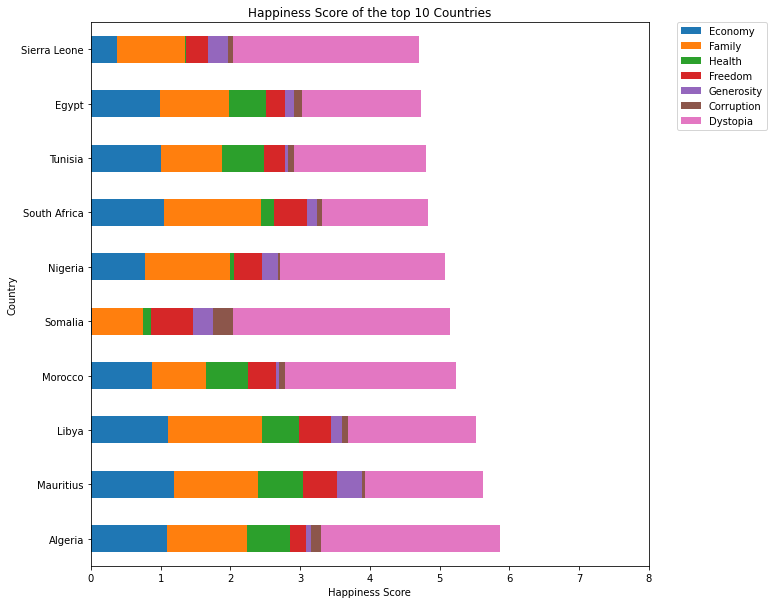

In [139]:
data_A[['Economy', 'Family','Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia']].head(10).plot(kind='barh',
                                                                xticks=np.arange(9), stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Histogram of Job Satisfaction

Text(0.5, 1.0, 'Distribution of Job Satisfaction')

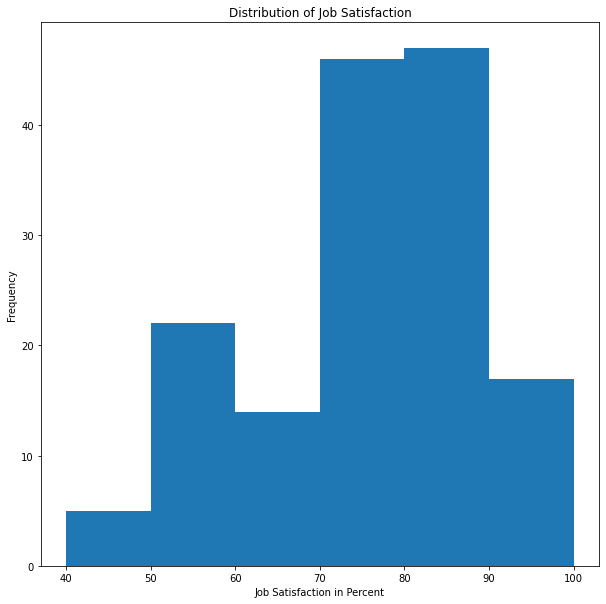

In [140]:
data['Job Satisfaction'].plot(kind='hist', bins=[ 40, 50, 60, 70, 80, 90, 100], figsize=(10,10))

plt.xlabel("Job Satisfaction in Percent")
plt.title("Distribution of Job Satisfaction")

# Scatter Plot -Pair

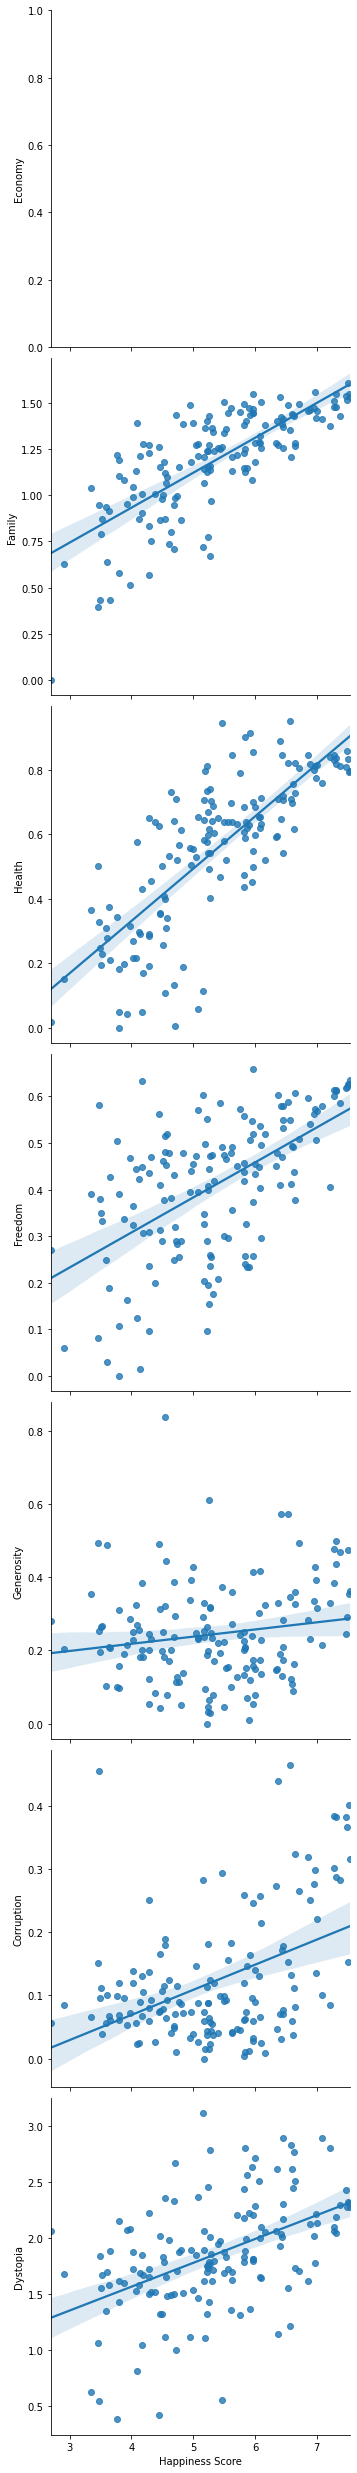

In [142]:
sns.pairplot(data=data, kind='reg', size = 5,
                  x_vars=['Happiness Score'],
                  y_vars=['Economy', 'Family','Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia'])


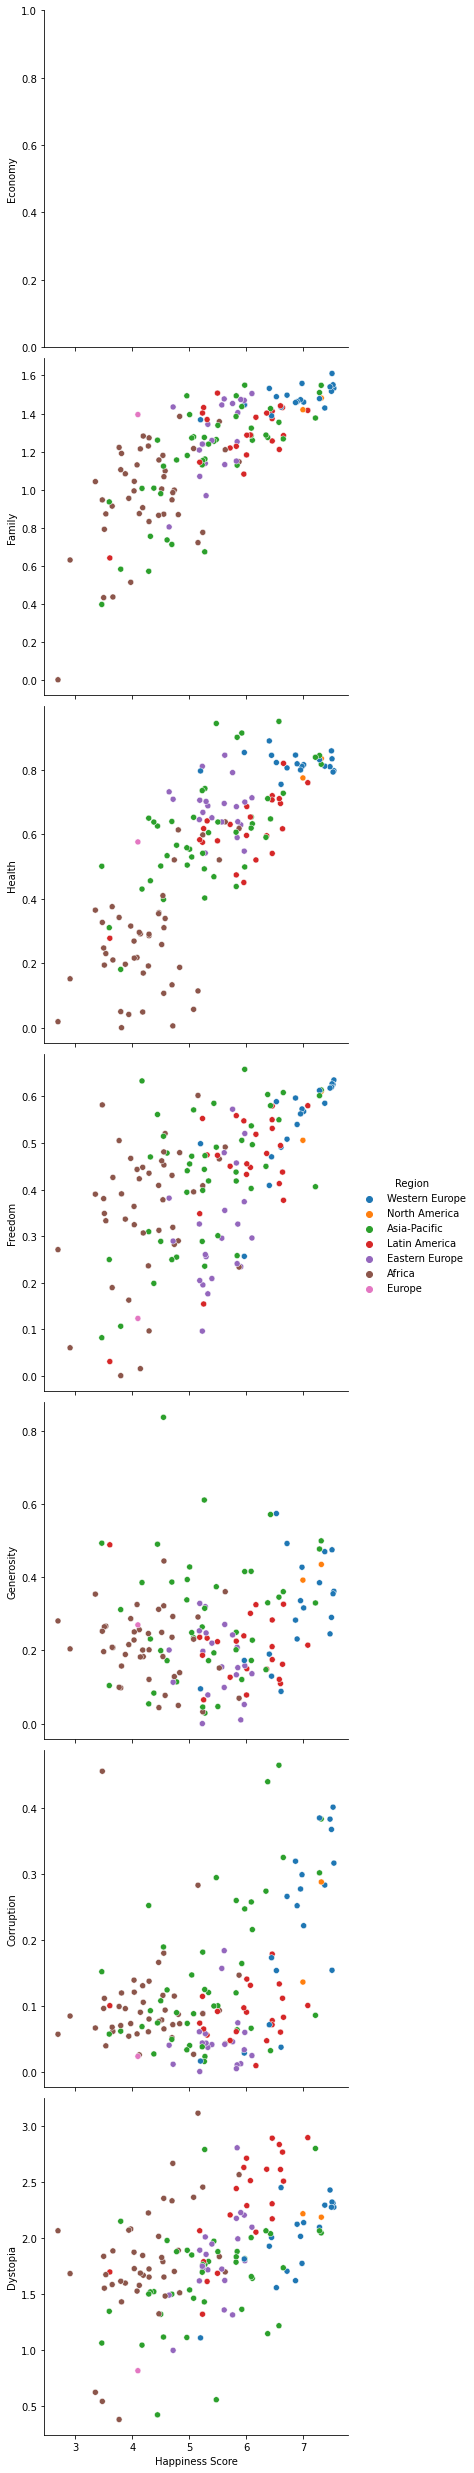

In [143]:
sns.pairplot(data=data, size = 5, hue='Region',
                  x_vars=['Happiness Score'],
                  y_vars=['Economy', 'Family','Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia'])

# Correlation

In [144]:
data.corr(method="pearson", min_periods=20)["Happiness Score"].sort_values(ascending=False)

Happiness Score     1.000000
Job Satisfaction    0.812873
Economy             0.808678
Health              0.777731
Family              0.749612
Freedom             0.567948
Dystopia            0.481117
Corruption          0.438262
Generosity          0.164123
Happiness Rank     -0.992663
Name: Happiness Score, dtype: float64

In [145]:
data.corr(method="pearson", min_periods=20)["Happiness Score"].abs().sort_values(ascending=False)


Happiness Score     1.000000
Happiness Rank      0.992663
Job Satisfaction    0.812873
Economy             0.808678
Health              0.777731
Family              0.749612
Freedom             0.567948
Dystopia            0.481117
Corruption          0.438262
Generosity          0.164123
Name: Happiness Score, dtype: float64

If we ignore the Happiness Rank, Job Satisfaction seems to have the highest correlation with the Happiness Score.

In [146]:
data.corr(method="pearson", min_periods=20)


,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
Happiness Rank,1.000000,-0.992663,-0.809521,-0.733902,-0.776602,-0.550111,-0.142348,-0.415532,-0.489194,-0.814535
Happiness Score,-0.992663,1.000000,0.808678,0.749612,0.777731,0.567948,0.164123,0.438262,0.481117,0.812873
Economy,-0.809521,0.808678,1.000000,0.685524,0.838884,0.363843,-0.015614,0.358750,0.022620,0.700662
Family,-0.733902,0.749612,0.685524,1.000000,0.606674,0.412633,0.050771,0.236262,0.075480,0.623266
Health,-0.776602,0.777731,0.838884,0.606674,1.000000,0.340986,0.068895,0.286777,0.055886,0.704795
Freedom,-0.550111,0.567948,0.363843,0.412633,0.340986,1.000000,0.319387,0.501632,0.092923,0.500655
Generosity,-0.142348,0.164123,-0.015614,0.050771,0.068895,0.319387,1.000000,0.292363,-0.102683,0.220032
Corruption,-0.415532,0.438262,0.358750,0.236262,0.286777,0.501632,0.292363,1.000000,-0.014995,0.337131
Dystopia,-0.489194,0.481117,0.022620,0.075480,0.055886,0.092923,-0.102683,-0.014995,1.000000,0.281655
Job Satisfaction,-0.814535,0.812873,0.700662,0.623266,0.704795,0.500655,0.220032,0.337131,0.281655,1.000000


<AxesSubplot:>

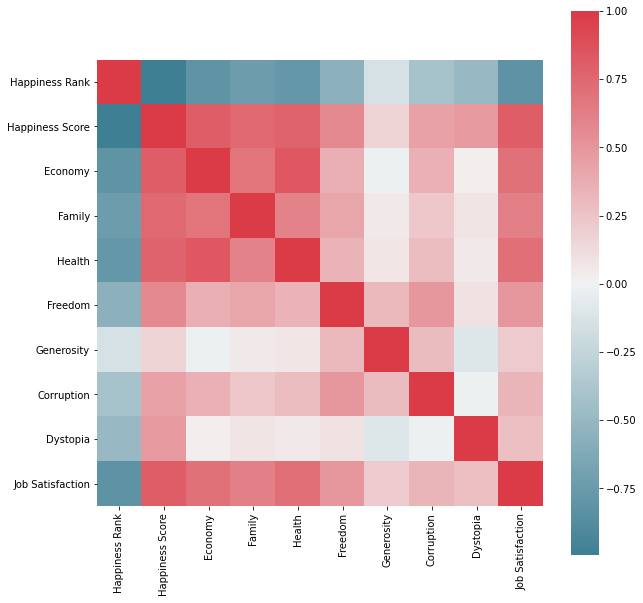

In [147]:
corr = data.corr(method = "pearson")

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

# Probabilities

 Happiness score over 6.0 is from Western Europe

In [149]:
data[data['Happiness Score'] > 6].shape[0]

44

In [150]:
data[(data['Happiness Score'] > 6) & (data['Region'] == 'Western Europe')].shape[0]

17

In [151]:
float(len(data[(data['Happiness Score'] > 6) & (data['Region'] == 'Western Europe')]))/float(len(data[data['Happiness Score'] > 6]))

0.38636363636363635

In [152]:
print("The probability that a randomly selected country with happiness score over 6.0 is form Western Europe is {0:.0%}".format(float(data[(data['Happiness Score'] > 6) & (data['Region'] == 'Western Europe')].shape[0]

)/float(data[data['Happiness Score'] > 6].shape[0])))

The probability that a randomly selected country with happiness score over 6.0 is form Western Europe is 39%


# Matrices

matrix:rows correspond to countries and the columns to the regions.
0/1 values where entry (i,j) is a 1 if the country in row i is in the region in column j and a 0 otherwise.

In [154]:
data.shape

(151, 11)

In [155]:
Western_Europe = []
Eastern_Europe = []
North_America = []
Latin_America = []
Asia_Pacific = []
Africa = []
Europe=[]

In [156]:
for x in data['Region']:
    if x == 'Western Europe':
         Western_Europe.append(1)
    else: Western_Europe.append(0)

In [157]:
for x in data['Region']:
    if x == 'Eastern Europe':
         Eastern_Europe.append(1)
    else: Eastern_Europe.append(0)

In [158]:
for x in data['Region']:
    if x == 'North America':
         North_America.append(1)
    else: North_America.append(0)

In [159]:
for x in data['Region']:
    if x == 'Latin America':
         Latin_America.append(1)
    else: Latin_America.append(0)


In [160]:
for x in data['Region']:
    if x == 'Asia-Pacific':
         Asia_Pacific.append(1)
    else: Asia_Pacific.append(0)


In [161]:
for x in data['Region']:
    if x == 'Africa':
         Africa.append(1)
    else: Africa.append(0)

In [162]:
for x in data['Region']:
    if x == 'Europe':
         Europe.append(1)
    else: Europe.append(0)

In [175]:
Matrix = pd.DataFrame(index=data.index)


In [176]:
Matrix['Western Europe'] = Western_Europe
Matrix['Eastern Europe'] = Eastern_Europe
Matrix['North America'] = North_America
Matrix['Latin America'] = Latin_America
Matrix['Asia Pacific'] = Asia_Pacific
Matrix['Africa'] = Africa
Matrix['Europe'] = Europe

In [177]:
Matrix.head(20)

,Western Europe,Eastern Europe,North America,Latin America,Asia Pacific,Africa,Europe
Country,,,,,,,
Norway,1,0,0,0,0,0,0
Denmark,1,0,0,0,0,0,0
Iceland,1,0,0,0,0,0,0
Switzerland,1,0,0,0,0,0,0
Finland,1,0,0,0,0,0,0
Netherlands,1,0,0,0,0,0,0
Canada,0,0,1,0,0,0,0
New Zealand,0,0,0,0,1,0,0
Sweden,1,0,0,0,0,0,0


In [178]:
array_Matrix = Matrix.head(20)

In [179]:
array_Matrix

,Western Europe,Eastern Europe,North America,Latin America,Asia Pacific,Africa,Europe
Country,,,,,,,
Norway,1,0,0,0,0,0,0
Denmark,1,0,0,0,0,0,0
Iceland,1,0,0,0,0,0,0
Switzerland,1,0,0,0,0,0,0
Finland,1,0,0,0,0,0,0
Netherlands,1,0,0,0,0,0,0
Canada,0,0,1,0,0,0,0
New Zealand,0,0,0,0,1,0,0
Sweden,1,0,0,0,0,0,0
